# Imbalanced data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
import matplotlib.image as mpimg
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import sklearn.metrics as metrics

from sklearn.utils import class_weight

import re


pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [2]:
# Import customer satisfaction datataset

dataset = pd.read_csv('bank.csv',delimiter=';')
dataset.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


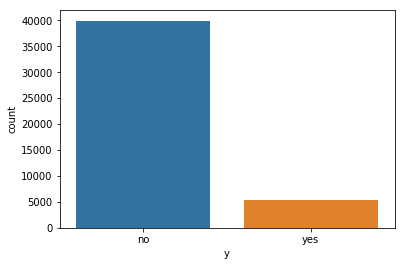

In [3]:
sns.countplot(x='y',data=dataset)

In [4]:
#Verwijderen van de 'duration' kolom

dataset.drop('duration',axis=1, inplace=True)


In [5]:
# yes -> 1 and no -> 0

dataset.y.replace({'no':0,'yes':1},inplace=True)
dataset.loan.replace({'no':0,'yes':1},inplace=True)
dataset.default.replace({'no':0,'yes':1},inplace=True)
dataset.housing.replace({'no':0,'yes':1},inplace=True)

In [6]:
# One-hot encoding van categorische variabelen

# job
dataset = pd.concat([dataset,pd.get_dummies(dataset['job'], prefix='job')],axis=1)
dataset.drop(['job'],axis=1, inplace=True)

# marital
dataset = pd.concat([dataset,pd.get_dummies(dataset['marital'], prefix='marital')],axis=1)
dataset.drop(['marital'],axis=1, inplace=True)

# education
dataset = pd.concat([dataset,pd.get_dummies(dataset['education'], prefix='education')],axis=1)
dataset.drop(['education'],axis=1, inplace=True)

# contact
dataset = pd.concat([dataset,pd.get_dummies(dataset['contact'], prefix='contact')],axis=1)
dataset.drop(['contact'],axis=1, inplace=True)

# month
dataset = pd.concat([dataset,pd.get_dummies(dataset['month'], prefix='month')],axis=1)
dataset.drop(['month'],axis=1, inplace=True)

# poutcome
dataset = pd.concat([dataset,pd.get_dummies(dataset['poutcome'], prefix='poutcome')],axis=1)
dataset.drop(['poutcome'],axis=1, inplace=True)

In [7]:
# Opsplitsen in features en targets

y = dataset.y.values
X = dataset.drop('y',axis=1)

print(X.shape)
print(y.shape)

(45211, 47)
(45211,)


In [8]:
# Splitsen in training set en test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, random_state =0)


In [9]:
# Scaling met MinMax scaler

# Om conversion warning te vermijden:

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8824
           1       0.62      0.18      0.27      1176

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.76      0.58      0.61     10000
weighted avg       0.87      0.89      0.86     10000

[[8694  130]
 [ 968  208]]
89.02


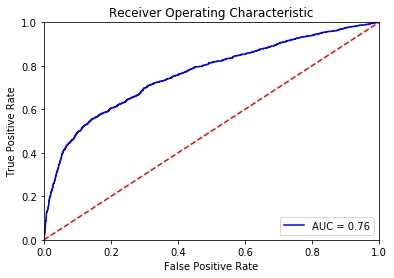

In [10]:
# Logistic regression

model = LogisticRegression(C=1, solver='liblinear')

# Trainen van het model

model.fit(X_train,y_train)

# Testen van het model

y_pred = model.predict(X_test)


print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

# ROC
probs = model.predict_proba(X_test)
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Classweight balancing

As the data is unbalanced, the neural netwerk tends to have a preference for the majority class. 
One of the approaches is to use classweight balancing. This means that during the training phase, a misclassification of a sample from the minority class results in a higher loss.



              precision    recall  f1-score   support

           0       0.94      0.77      0.85      8824
           1       0.27      0.62      0.38      1176

   micro avg       0.76      0.76      0.76     10000
   macro avg       0.60      0.70      0.61     10000
weighted avg       0.86      0.76      0.79     10000

[[6830 1994]
 [ 444  732]]
75.62


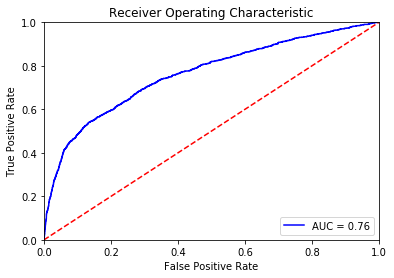

In [11]:
# Logistic regression

model = LogisticRegression(C=1, solver='liblinear',class_weight='balanced')

# Trainen van het model

model.fit(X_train,y_train)

# Testen van het model

y_pred = model.predict(X_test)


print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

# ROC
probs = model.predict_proba(X_test)
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Oversampling met SMOTE

Another way of dealing with unbalanced data is to oversample the data. This means that the data will be balanced by creating additional samples from the minority class until equilibrium.

In [14]:
# Oversampling with SMOTE

from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE( k_neighbors=4, n_jobs=-1, m_neighbors=8).fit_resample(X_train, y_train)

print(y_resampled.shape)

(62196,)




              precision    recall  f1-score   support

           0       0.94      0.76      0.84      8824
           1       0.26      0.63      0.37      1176

   micro avg       0.75      0.75      0.75     10000
   macro avg       0.60      0.70      0.61     10000
weighted avg       0.86      0.75      0.79     10000

[[6729 2095]
 [ 436  740]]
74.69


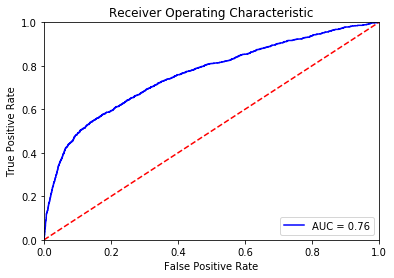

In [13]:
# Logistic regression

model = LogisticRegression(C=1, solver='liblinear')

# Trainen van het model

model.fit(X_resampled,y_resampled)

# Testen van het model

y_pred = model.predict(X_test)


print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

# ROC
probs = model.predict_proba(X_test)
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()